In [1]:
#Anything worth doing is worth doing badly
#Just keep carrying water
#Do hard things often. 
#You're worried about making the wrong decision and what other people will think
#do, re-evaluate, it's all right if this isn't the perfect thing.
# you can refine your practice as you go along.
# Now the direct aim is to establish the habit of practice. 
# or at least the habit of not avoiding practice

#Goals were to do datetime and visualization that happened
#Engage more, less down time, less indecision, more action
#Well done - 2 hours
#Keep it up tomorrow
#Goals for tomorrow -more tangible outcomes 

#Monday July 27th - 1 hr. 
# --> outcomes? 

# 1. Visualize the various prices time series (nearby, close, etc)
# 2. Visualize WASDE data time series

   #. learn how to display multiple series in one plot
    #. with legend
    #. with custom colors and shapes
    # (seaborn?)
# 3. Merge the price and stocks data (stocks to use ratio)
# 4. Correlation plots, feature selection?    


#Fundamentals - supply and demand + historical price data 

#If you have clear trend and seasonality in your time series, 
#...then model these components, 
#...remove them from observations, 
#...then train models on the residuals.

#Forecasting Models - unit root model with trend and drift
#https://www.imf.org/external/pubs/ft/wp/2004/wp0441.pdf
#ARMA, ARCH, GARCH, 
#Make yield, stocks, demand, supply, price dataframe
#cluster the data? visualize clusters?
#https://medium.com/analytics-vidhya/time-series-prediction-with-multimodal-distribution-building-mixture-density-network-with-keras-b1020d9de5a1
# Do something challenging - merge the data-sets (Wednesday Aug 5th)
# Do something that moves the needle forward for the portfolio


Hello world!


        dates  nearby_close
0  2008-02-04        1326.0
1  2008-02-05        1323.0
2  2008-02-06        1318.5
3  2008-02-07        1331.5
4  2008-02-08        1339.0


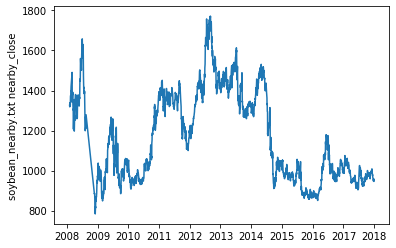

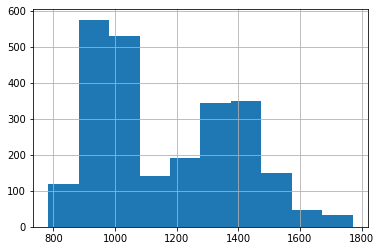

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

### Rows 40 
#[file for file in os.listdir('./input') if 'USDAProj_' not in file]
### NEARBY CONTRACT CLOSING PRICES ###
soyNear = pd.read_csv('./input/soybean_nearby.txt') 
print(soyNear.head())


soyNear['dates'] = pd.to_datetime(soyNear['dates'])
soyNear.set_index('dates', drop=True, inplace = True)
soyNear = soyNear.sort_index()

#soyNear = soyNear.groupby(pd.Grouper(freq='1D')).mean()

#nearby_close; 2477 rows; 2008-2017

plt.plot(soyNear.index, soyNear.nearby_close)
plt.ylabel('soybean_nearby.txt nearby_close')
plt.show()

soyNear.nearby_close.hist()
plt.show()

#df3 = pd.read_csv('./input/soybean_JUL14.txt') 
#open, high, low, close, volume, opentInt, and TotalOpenInt; 942 rows; 2010-2014

(118, 69)


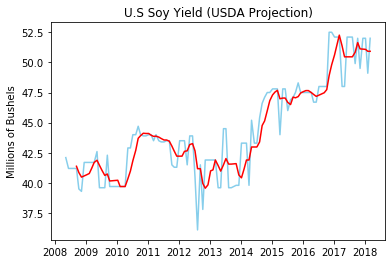

In [4]:
#Area Planted, Area Harvested, Yield, 
#Beginning Stocks, Production, Imports, Total Supply, Crushings, Exports, Seed, Residual, Total Use, Ending Stocks, 
# World Beginning Stocks, World Production, World Imports, World DomesticCrush, World DomesticTotal, World Exports, World EndingStocks, 
### World, United States, Argentina, Brazil, China, Japan, Mexico, EU ###
#Beginning Stocks
#Production
#Imports
#DomesticCrush
#DomesticTotal
#Exports
#Ending Stocks

soyfiles = [file for file in os.listdir('./input') if 'USDAProj_Soybean' in file]
soyData = [pd.read_csv('./input/' + file) for file in soyfiles]

df1 = pd.concat(soyData)

######################################
### LOOKING AT VARIABLES OVER TIME ###
######################################
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', drop=True, inplace = True)
df1 = df1.sort_index()

#pd.concat( df1.groupby(pd.Grouper(freq='M')).apply(lambda df: df.iloc[0]) )
### Some WASDE dates include multiple associated values - 
#the second one is the then contemporary projection 
dfs = []
for i, df in df1.groupby(pd.Grouper(freq='1M')):    
    try:
        dfs.append(df.iloc[1])
    except:
        pass
df1 = pd.concat(dfs, axis = 1).transpose()
print(df1.shape)

#print(df1.shape)
#pd.Series(df1.index).to_csv('dates_raw.csv')
#df1 = df1.resample('1M').mean()
#print(df1.shape)
#pd.Series(df1.index).to_csv('dates_resampled.csv')


df1['Yield-Annual'] = df1.groupby(pd.Grouper(freq='Y')).Yield.transform('mean')
df1['Yield-Smooth'] = df1.Yield.rolling(window=5).mean()

# ### YIELD ###
plt.plot(df1.index, df1.Yield, color='skyblue')
plt.plot(df1.index, df1['Yield-Smooth'], color='red')

plt.title('U.S Soy Yield (USDA Projection)')
plt.ylabel('Millions of Bushels')
plt.show()

# plt.plot(df1.index, df1['Area Harvested'])
# plt.show()

# plt.plot(df1.index, df1['Area Planted'])
# plt.show()

#Date, datetime,
#visualization
 
#df1.iloc[len(df1)-12:]
#df1.loc['2014-03-10']
#Can compare some results with homie's notebook here --
#https://www.kaggle.com/nicewinter/soybean-wsde-analysibs

In [11]:
#len(soyData)
#[df.Date.min()  for df in soyData]
#['2008/05/09',
# '2016/05/10',
# '2012/05/10',
# '2017/05/10',
# '2011/05/11',
# '2014/05/09',
# '2013/05/10',
# '2009/05/12',
# '2015/05/12',
# '2007/05/11',
# '2010/05/11']

(118, 69)